# Benchmark of PYSCAL_GLASSVIEWER 

Pyscal_Glassviewer is a FORK of Pyscal, which is modified and improved for Metal Glass data post-processing tasks by Zihao Bai, Jilin University.
This Benchmark uses a POSCAR file from MD of Al melting process. In order to test the partial PDF module and SRO module, we label the atoms into Al1 and Al2. The properties is as following:

Box parameter:

    55.996 0.0 0.0
    0.0 56.923 0.0
    0.0 0.0 56.369
    
Atom Numbers:

    Al1 Al2
    10000 976 


## Initialization

In [1]:
import sys
sys.path.append("../src")
import pyscal as pc
import pyscal.traj_process as ptp
import matplotlib.pyplot as plt
import numpy as np

## Split Trajectory

In [2]:
files=ptp.split_trajectory('XDATCAR',format='poscar',makedir=True) #split the poscar from XDATCAR
file=files[0]

## Read Files

Here we do not use the splitted trajectory above. Instead we choose a POSCAR which satisfy the condition described in the summary.

In [3]:
file='POSCAR_Al1_Al2'
format="poscar"
sys1 = pc.System()
sys1.read_inputfile(file, format=format)#format{'lammps-dump', 'poscar', 'ase', 'mdtraj'}

## Find Neighbors

We must run the finding-neighbor algorithms before we calculate any property which is related to atom neighbors.

In [4]:
sys1.find_neighbors(method="voronoi")#method can be selected among "cutoff voronoi number", details can 

## PDF-Total

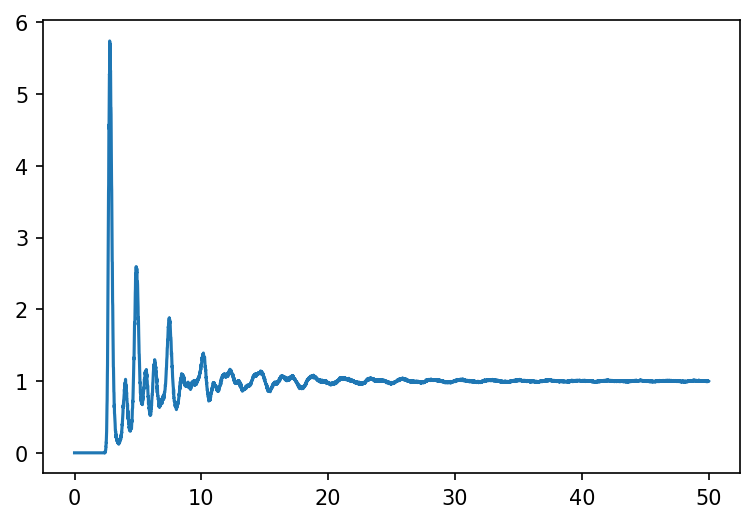

In [5]:

histnum=5000#直方图分割数量(密度)
pdf, r=sys1.calculate_pdf(histobins=histnum,histomin=0,cut=50,threadnum=20)
plt.figure(dpi=150)
plt.plot(r,pdf);


## PDF-Partial

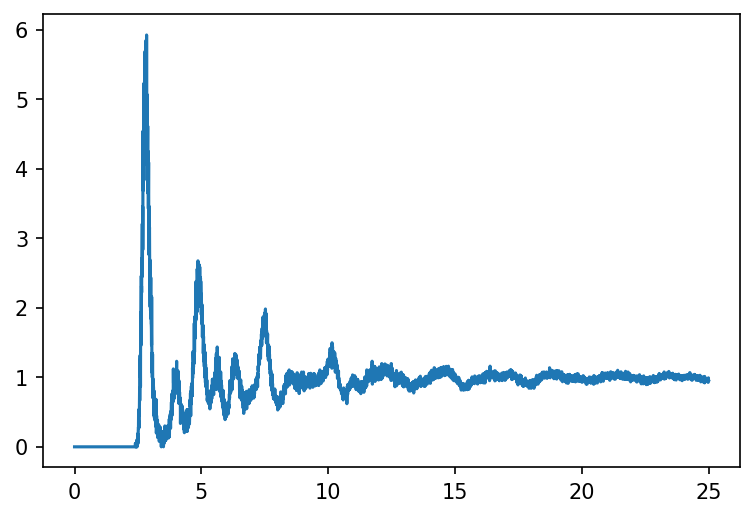

In [6]:
histnum=5000#直方图分割数量(密度)
pdfp, r=sys1.calculate_pdf(histobins=histnum,histomin=0,cut=25,partial=True,centertype=1,secondtype=2)
plt.figure(dpi=150)
plt.plot(r,pdfp);

## Bond Angle Distribution

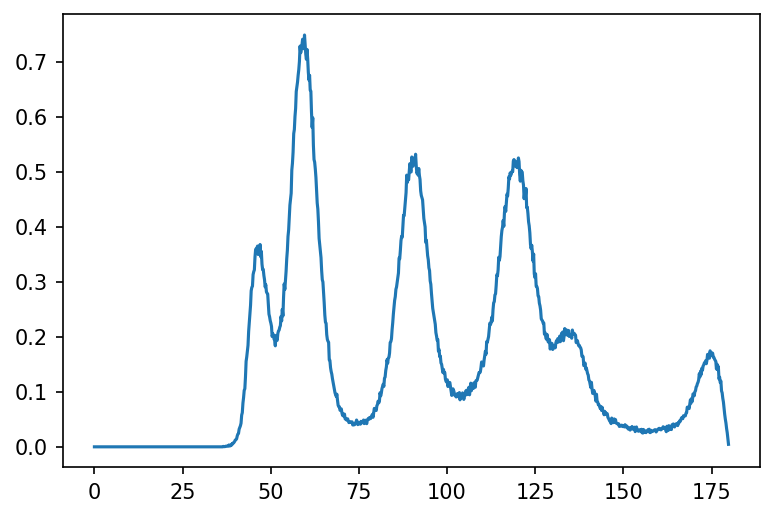

In [7]:
bad, r2=sys1.calculate_bad(histobins=1000,histomin=0,histomax=np.pi);
plt.figure(dpi=150)
plt.plot(r2*180/np.pi,bad);

## Structure Factor-FFT Method

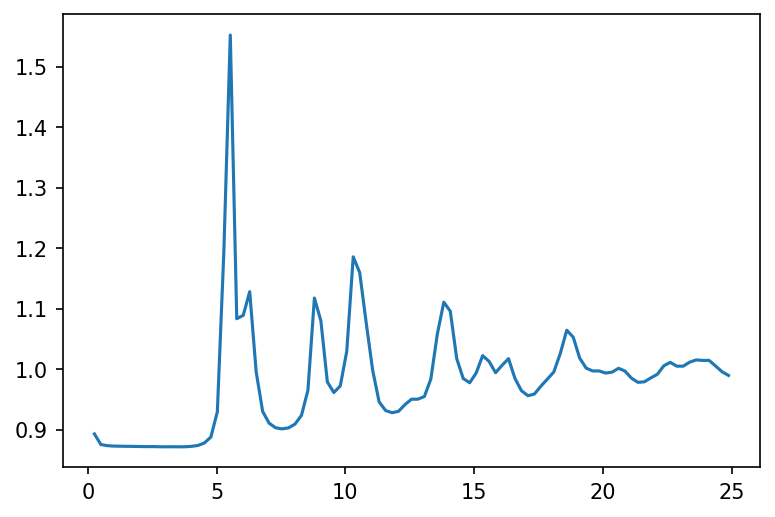

In [8]:
sf,q=sys1.calculate_sf(pdf, r,0);
plt.figure(dpi=150)
plt.plot(q[0:int(len(q)/20/histnum*2000)],sf[0:int(len(sf)/20/histnum*2000)]);


## Structure Factor-Integration Method

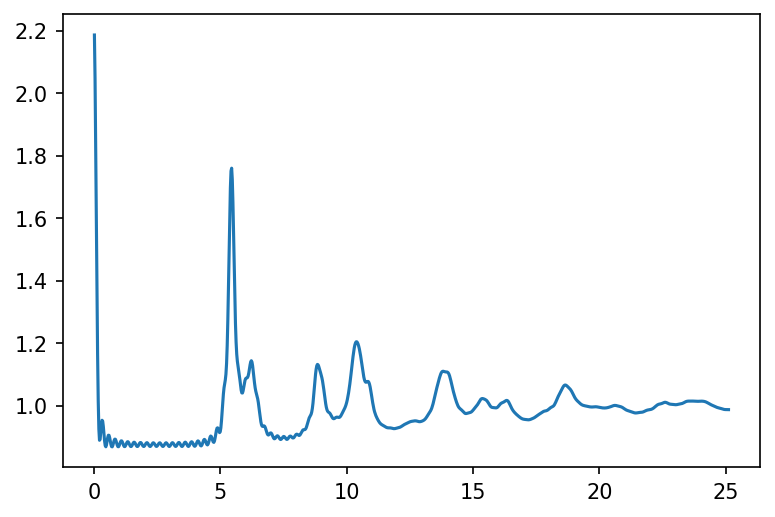

In [9]:
sf,q=sys1.calculate_sf(pdf, r,10);
plt.figure(dpi=150)
plt.plot(q[0:int(len(q)/20/histnum*2000)],sf[0:int(len(sf)/20/histnum*2000)]);

## SRO-Cowley

In [10]:
SRO_Cowley=sys1.calculate_pmsro(reference_type=1,compare_type=2)
print('The Cowley SRO is '+str(SRO_Cowley[0]))

The Cowley SRO is 0.0393368970897108


## SRO-Cargill-Spaepen

In [11]:
SRO_CS_unnorm=sys1.calculate_pmsro_CS(reference_type=1,compare_type=2,normalization=False)
SRO_CS_norm=sys1.calculate_pmsro_CS(reference_type=1,compare_type=2,normalization=True)
print('The Cowley SRO (unnormalized) is '+str(SRO_CS_unnorm))
print('The Cowley SRO (nnormalized)  is '+str(SRO_CS_norm))


The Cowley SRO (unnormalized) is -0.03794064956327503
The Cowley SRO (nnormalized)  is -0.3892886598620064


## CNA

In [12]:
CNA=sys1.calculate_cna()
print('CNA statistics of the system is '+str(CNA))
print('the structure number of atom0 is: '+str(sys1.atoms[0].structure))

CNA statistics of the system is {'others': 4038, 'fcc': 5738, 'hcp': 1139, 'bcc': 61, 'ico': 0}
the structure number of atom0 is: 2


## Voronoi Structure Identification

In [13]:
sys1.calculate_vorovector()
print('the vorovector (n3, n4, n5, n6) for Atom 0 is '+str(sys1.atoms[0].vorovector))

the vorovector (n3, n4, n5, n6) for Atom 0 is [0, 14, 0, 0]


## BOO

In [14]:
sys1.calculate_q([2,4,5,6])
BOO=sys1.get_qvals([2,4,5,6])
print('the BOO number (q2, q4, q5, q6) for Atom 0 is '+str(BOO[0][0])+' '+str(BOO[0][1])+' '+str(BOO[0][2])+' '+str(BOO[0][3]))

the BOO number (q2, q4, q5, q6) for Atom 0 is 0.09328374905692187 0.06986055915482668 0.10704426180048338 0.07135551396271009


## Output the Atom Configuration and Atom Property

In [15]:
sys1.to_file('out',format='poscar')#We can directly output the atom configuration into poscar 
sys1.to_file('out'+file,format='lammps-dump',customkeys=['aq2','aq4','aq5','aq6'])
#aqn for average qn, qn for qn, other key name is the same with the attribute name, only lammps support custumkeys


c:\Users\baizh\anaconda3\lib\site-packages\pyscal-2.10.15-py3.9-win-amd64.egg\pyscal\formats\vasp.py:61: UserWarning: Using legacy poscar writer, to use ASE backend specify species
  warnings.warn("Using legacy poscar writer, to use ASE backend specify species")


# Visualization tool

This is a interactive tool which can only be used in Jupyter Notebook environment, and cannot be seen here.

In [16]:
sys1.show()

interactive(children=(FloatSlider(value=1.0, description='radius', max=30.0, min=1.0, step=1.0), Text(value='S…